# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, I will be analyzing data from The Movie Database (TMDb). This data set contains 10,866 rows and the following column attributes:</br>
<ol>
<li>id - This is A unique identifier for each movie.</ li>
<li>imdb_id - A unique identifier for each movie on IMDB.</ li>
<li>popularity - A numeric quantity specifying the movie popularity.</ li>
<li>budget - The budget in which the movie was made.</ li>
<li>revenue - The worldwide revenue generated by the movie.</ li>
<li>original_title - The title of the movie before translation or adaptation.</ li>
<li>cast - The name of lead and supporting actors.</ li>
<li>homepage - A link to the homepage of the movie.</ li>
<li>director - The director of the movie</ li>
<li>tagline - Movie tagline. </ li>
<li>keywords - The keywords or tags related to the movie.</ li>
<li>overview - A brief description of the movie.</ li>
<li>runtime - The running time of the movie in minutes.</ li>
<li>genre - The genre of the movie, Action, Comedy ,Thriller etc.</ li>
<li>production_companies - The production house of the movie.</ li>
<li>release_date - The date on which it was released.</ li>
<li>vote_count - number of vote ratings the movie recieved.</ li>
<li>vote_average - average ratings the movie recieved.</ li>
<li>release_year - The year on which it was released.</ li>
<li>budget_adj - shows the budget of the associated movie in terms of 2010 dollars.</ li>
<li>revenue_adj - shows the revenue of the associated movie in terms of 2010 dollars.</ li>
</ ol>
</br>     
The project process is divided into three parts: Data Wrangling, Exploratory Data Analysis, and Conclusion.</br>

### Questions
This analysis will answer the following questions: </br>
<ol>
<li>How did the amount of produced films changed over time?</li>
<li>Which Month Released Highest Number Of Movies In all Of The Years?</li>
<li>What is the most and what is the least popular movie?</li>
<li>What are the 10 most and least profitable movies?</li>
<li>What are the correlations between popularity, revenue, budget and profit?</li>
</ol>


In [3]:
#importing all packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
#loading and inspecting dataset
df =pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#printing concised summary of the report
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#checking the number of rows and columns
df.shape

(10866, 21)

The dataset has 10,866 rows and 21 columns in total

In [7]:
# To show information on each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning
<ol>
<li>Deleting columns that are not required.</li>
<li>Handling zero values</li>
<li>Checking and droping Null values. </li>
<li>Checking and Removing duplicates. </li>
<li>Changing the format of release date into DateTime format.</li>
<li>Handling columns with pipes </li>
<li>Checking datatype of columns </li>
</ol>

### Deleting columns that are not required for this analysis

In [8]:
#Lets drop columns that are not needed for this analysis 
#Dropping columns such as imdb_id as there is already a unique identifier "id". Droping tagline, keywords, overview and homepage as well.
df.drop(['imdb_id', 'tagline', 'keywords', 'overview', 'homepage'], axis =1, inplace = True)

In [9]:
#Checking the new number of columns
df.shape

(10866, 16)

### Handling zero values
Checking for zero values in revenue, revenue_adj, budget, budget_adj and runtime as this might inconvenience the analysis if not handled. Zero values in these columns may indicate these information were not recorded for the movies.

In [10]:
#Checking revenue, budget and runtime column rows for Zero values
zero_values= df.query('revenue==0 or budget == 0 or runtime ==0 or budget_adj ==0 or revenue_adj ==0').head()
zero_values.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04


In [11]:
#replacing the zero values with NAN.

df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

### Checking for Null values

In [12]:
#Checking for null values
df.isna().any()

id                      False
popularity              False
budget                   True
revenue                  True
original_title          False
cast                     True
director                 True
runtime                  True
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj               True
revenue_adj              True
dtype: bool

   9 Columns have null values. 

In [13]:
#total null values in each column in the dataset
df.isna().sum()

id                         0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

### Dropping Null values

In [14]:
#Drop null values
df.dropna(inplace = True)

#check for any null left
df.isna().sum().sum()

0

### Checking for duplicates and dropping them

In [15]:
#Checking for duplicates
sum(df.duplicated())

1

In [16]:
#dropping the duplicates
df.drop_duplicates(inplace = True)

In [17]:
#checking new dataframe shape
df.shape

(3805, 16)

### Changing release_date format to datetime format

In [18]:
#Changing format of release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [19]:
#check the new release_date format
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


### Separating columns with pipe | into different columns
Columns such as cast, director, genres and production_companies

In [20]:
#creating new dataframes to hold the separated columns
df_c = (df['cast'].str.split('|', expand= True).rename(columns= lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand= True).rename(columns= lambda x: f"director_{x+1}"))
df_g = (df['genres'].str.split('|', expand= True).rename(columns= lambda x: f"genres{x+1}"))
df_p = (df['production_companies'].str.split('|', expand= True).rename(columns= lambda x: f"production_companies{x+1}"))

df_c.head(2)
df_p.head(2)

,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None


In [21]:
#joining the dataframes back to original dataset
df = df.join([df_c, df_d, df_g, df_p]) 

In [22]:
#droping the original columns that were separated
df = df.drop(['cast', 'director', 'genres', 'production_companies'],axis = 1)

In [23]:
#checking new df shape
df.shape

(3805, 39)

In [24]:
#checking the dataset
df.head()

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,...,genres1,genres2,genres3,genres4,genres5,production_companies1,production_companies2,production_companies3,production_companies4,production_companies5
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,2015,...,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,2015,...,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2015-04-01,2947,7.3,2015,...,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3805 non-null   int64         
 1   popularity             3805 non-null   float64       
 2   budget                 3805 non-null   float64       
 3   revenue                3805 non-null   float64       
 4   original_title         3805 non-null   object        
 5   runtime                3805 non-null   float64       
 6   release_date           3805 non-null   datetime64[ns]
 7   vote_count             3805 non-null   int64         
 8   vote_average           3805 non-null   float64       
 9   release_year           3805 non-null   int64         
 10  budget_adj             3805 non-null   float64       
 11  revenue_adj            3805 non-null   float64       
 12  cast_1                 3805 non-null   object        
 13  ca

In [26]:
#Concatenating all the separated columns into a single column and dropping the nan values
df['casts'] = df[df.columns[12:17]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
df['directors'] = df[df.columns[17:29]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
df['genres'] = df[df.columns[29:34]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
df['production_companies'] = df[df.columns[34:39]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
#dropping the multiple columns
df.drop(df.iloc[:, 12:39],inplace= True,  axis = 1)
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casts,directors,genres,production_companies
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda..."


In [28]:
#copying the dataframe into a new one
df2=df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3805 non-null   int64         
 1   popularity            3805 non-null   float64       
 2   budget                3805 non-null   float64       
 3   revenue               3805 non-null   float64       
 4   original_title        3805 non-null   object        
 5   runtime               3805 non-null   float64       
 6   release_date          3805 non-null   datetime64[ns]
 7   vote_count            3805 non-null   int64         
 8   vote_average          3805 non-null   float64       
 9   release_year          3805 non-null   int64         
 10  budget_adj            3805 non-null   float64       
 11  revenue_adj           3805 non-null   float64       
 12  casts                 3805 non-null   object        
 13  directors        

In [29]:
#Checking if all columns contain the intended data type
df2.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
runtime                        float64
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
casts                           object
directors                       object
genres                          object
production_companies            object
dtype: object

ALL the datatypes are the right types. The dataset is now ready for exploratory data analysis. The cleaned dataset has 3805 rows and 16 columns. The cleaned dataframe has been copied into df2

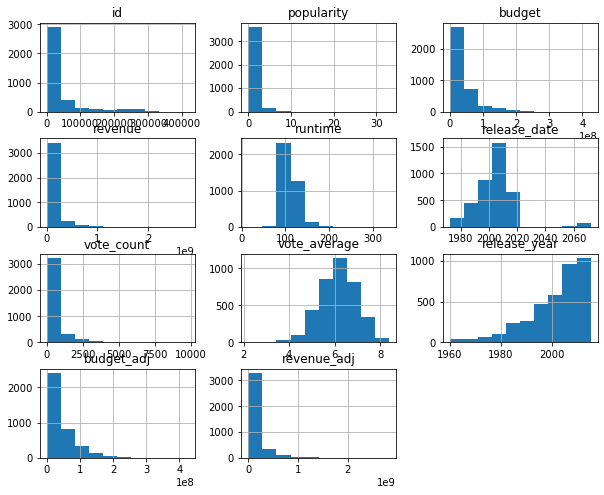

In [30]:
#viewing the distribution of some of the columns
df2.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: ("How did the amount of released movies change over time?)
Which year has the highest release of movies?


In [31]:
#Checking amount of movies produced by grouping by release year
movies_year = df2.groupby('release_year').id.count()
movies_year

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     47
1987     46
1988     56
1989     51
1990     52
1991     50
1992     53
1993     72
1994     61
1995     79
1996     84
1997     90
1998     90
1999    116
2000    104
2001    118
2002    125
2003    121
2004    142
2005    159
2006    168
2007    159
2008    161
2009    170
2010    177
2011    196
2012    157
2013    179
2014    165
2015    160
Name: id, dtype: int64

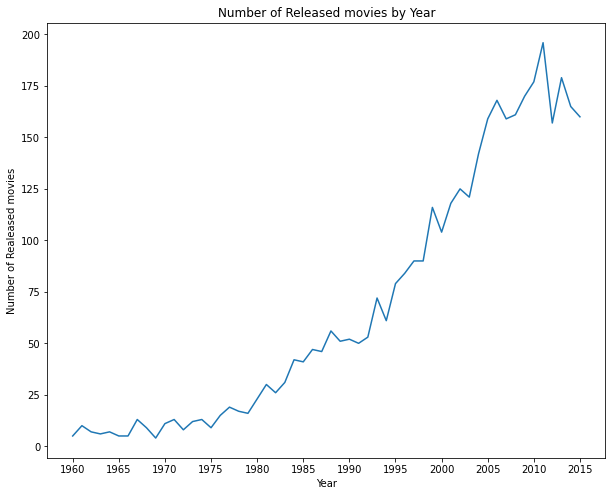

In [32]:
#Using a line graph to visualize how the amount of produced movies have changed over the years.
movies_year.plot(kind = 'line', figsize= (10,8),xticks = np.arange(1960,2016,5))

#setting graph labels
plt.title('Number of Released movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Realeased movies');

### Question 2: Which Month Released Highest Number Of Movies In All Of The Years?

In [34]:
#Creating a new column called month from the released date
df2['month'] = df2['release_date'].dt.month_name()
df2.head(1)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casts,directors,genres,production_companies,month
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",June


In [35]:
# using groupby to group number of movies by month
df_month = df2.groupby('month').id.count()

#creating a new data frame to hold the months and count of movies
df_month =pd.DataFrame(df_month)
#resetting to include index
df_month = df_month.reset_index()
df_month

,month,id
0,April,261
1,August,334
2,December,411
3,February,252
4,January,219
5,July,308
6,June,339
7,March,277
8,May,290
9,November,302


In [39]:
#To order the months categorically
sort_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df_month.index= pd.CategoricalIndex(df_month['month'], categories= sort_order, ordered= True )
df_month= df_month.sort_index()
df_month

,month,id
month,,
January,January,219
February,February,252
March,March,277
April,April,261
May,May,290
June,June,339
July,July,308
August,August,334
September,September,452


In [396]:
#Dropping index column
df_month=df_month.reset_index(drop= True)
df_month

,months,id
0,January,219
1,February,252
2,March,277
3,April,261
4,May,290
5,June,339
6,July,308
7,August,334
8,September,452
9,October,360


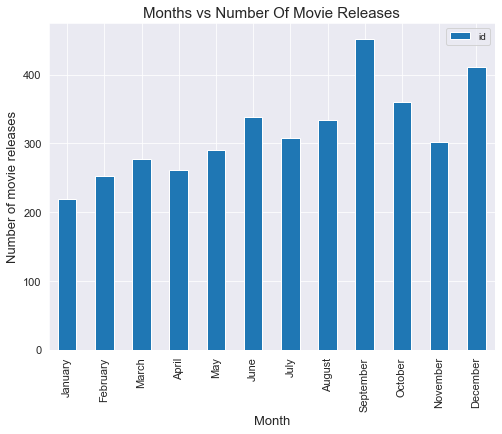

In [42]:
#plotting a bar chart to show months and the number of movies 
df_month.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
#setting the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

### Question 3: What is the Most and least popular movie?

In [43]:
#defining a funct 'Minmax' using the functions 'idmin' and 'idmax' to find the index of lowest popularity and index of Highest popularity.
'''
    The function prints the row related to the index.
'''
def Minmax(x):
    #using function 'idmin' to find the index of lowest popularity.
    min_index = df2[x].idxmin()
    #using function 'idmax' to find the index of Highest popularity.
    max_index = df2[x].idxmax()
    maxi = pd.DataFrame(df2.loc[max_index,:])
    mini = pd.DataFrame(df2.loc[min_index,:])
    
    #print the movie with high and low popularity
    print("The movie with the highest "+ x + " : ",df2['original_title'][max_index])
    print("The movie with the lowest "+ x + "  : ",df2['original_title'][min_index])
    #return the rows and drop any row with NaN value
    return pd.concat([maxi,mini],axis = 1).dropna()
    

#call the Minmax function.
Minmax('popularity')


The movie with the highest popularity :  Jurassic World
The movie with the lowest popularity  :  Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´


,0,6065
id,135397,203793
popularity,32.985763,0.010335
budget,150000000.0,30000000.0
revenue,1513528810.0,68129518.0
original_title,Jurassic World,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´
runtime,124.0,131.0
release_date,2015-06-09 00:00:00,2013-10-09 00:00:00
vote_count,5562,64
vote_average,6.5,5.5
release_year,2015,2013


### Question 4: What are the 10 most and least profitable movies?

In [86]:
#adding a new column called profit
df2['profit']= df2['revenue'] - df2['budget']
df2.head(1)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casts,directors,genres,production_companies,month,profit,revenue_level
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",June,1.363529e+09,high


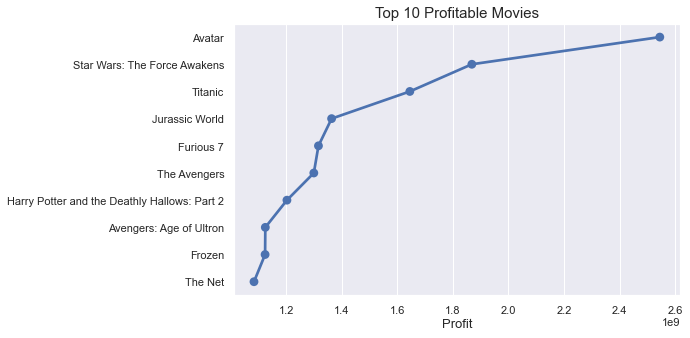

In [56]:
#making a plot to show top 10 most profitable movies.
#sorting the 'Profit' column in decending order and store it in a new dataframe,
profit_df = pd.DataFrame(df2['profit'].sort_values(ascending = False))

#creating new column 'original_title' in the new dataframe from the original dataframe
profit_df['original_title'] = df2['original_title']
x = list(map(str,(profit_df['original_title'])))
x = list(x[:10])
y = list(profit_df['profit'][:10])

#make a plot using pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(8,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13);


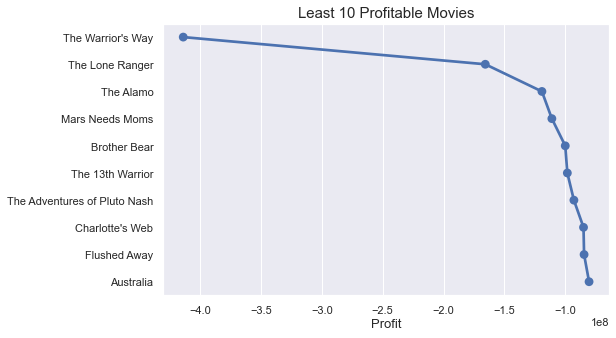

In [60]:
#make a plot which contain top 10 most profitable movies.
#sorting the 'Profit' column in ascending order and store it in a new dataframe,
profit_df = pd.DataFrame(df2['profit'].sort_values(ascending = True))

#creating new column 'original_title' in the new dataframe from the original dataframe
profit_df['original_title'] = df2['original_title']
x = list(map(str,(profit_df['original_title'])))
x = list(x[:10])
y = list(profit_df['profit'][:10])

#making a plot using pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(8,5)})

#setup the title and labels of the plot.
ax.set_title("Least 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13);

In [55]:
#using the previously defined Minmax function that pulls the minimum and maximum values to view information on the least and most profitable movie
Minmax('profit')

The movie with the highest profit :  Avatar
The movie with the lowest profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,2781505847.0,11087569.0
original_title,Avatar,The Warrior's Way
runtime,162.0,100.0
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
vote_count,8458,74
vote_average,7.1,6.4
release_year,2009,2010


### Question 5: What are the correlations between popularity, revenue, budget and profit?

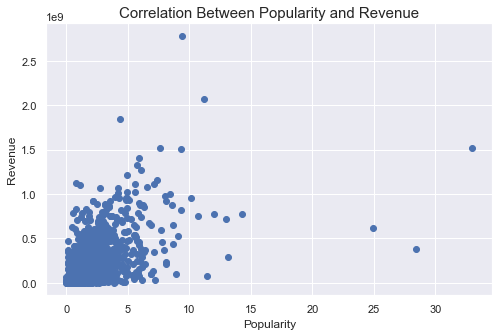

In [89]:
#using a scatter plot to show correlation between popularity and Revenue
x= df2['popularity']
y= df2['revenue']
plt.scatter(x,y);

# setting title labels and fontsize
plt.title('Correlation Between Popularity and Revenue', fontsize = 15)
plt.xlabel('Popularity', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12);


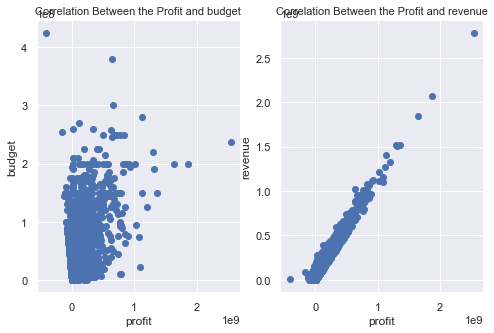

In [79]:
#using scatter plot to show correlation between the movie's profit, budget and revenue
w= df2['profit']
x= df2['budget']
y= df2['revenue']

fig = plt.figure()
#setting position of plots
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(w,x)
ax2.scatter(w,y)

#setting titles, labels and fontsize
ax1.set_title('Correlation Between the Profit and budget', fontsize = 11)
ax1.set_xlabel('profit')
ax1.set_ylabel('budget')

ax2.set_title('Correlation Between the Profit and revenue', fontsize = 11)
ax2.set_xlabel('profit')
ax2.set_ylabel('revenue');

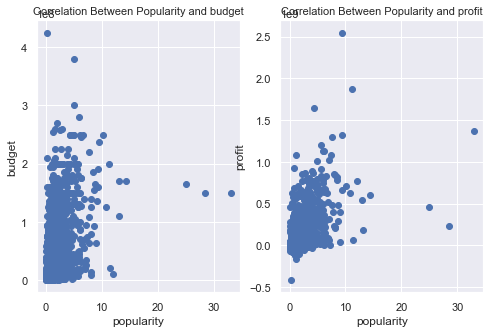

In [77]:
#using scatter plot to show correlation between the movie's popularity, budget and profit
w= df2['popularity']
x= df2['budget']
y= df2['profit']

#setting position of plots
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(w,x)
ax2.scatter(w,y)

#setting titles, labels and fontsize
ax1.set_title('Correlation Between Popularity and budget', fontsize = 11)
ax1.set_xlabel('popularity')
ax1.set_ylabel('budget')

ax2.set_title('Correlation Between Popularity and profit', fontsize = 11)
ax2.set_xlabel('popularity')
ax2.set_ylabel('profit');

## Conclusion

After thoroughly analyzing the TMDb dataset and answering questions through visualizations, below are key insights gotten in response to questions asked.

The first question "How did the amount of produced films changed over time?" reveals that the amount of produced movies significantly increased from 1960 to 2015. The year 2011 had the highest released movies (196). While the year 1969 had the lowest(4).
</br>

The second question "Which Month Released Highest Number Of Movies In all Of The Years?" reveals that more movies were released in the month of September (452). while the lowest amount of movies were released in January (219).
</br>

The third question "What is the most and what is the least popular movie?" indicates that Jurassic world is the most popular movie. Jurassic world came out in June 2015 and it features Christ Patt, Bryce Dallas, etc and it was directed by Colin Trevorrow. While the least popular movie is Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´. It was released in october 2013 and directed by Fyodor Bondarchuk.
</br>

The forth question "What are the 10 most and least profitable movies?" was answered using a pointplot line chart to show the top 10 and least 10 movies. Where movies like Avatar, starwars, the force awakens, Titanic, Jurassic world, Furious 7, The avengers earned the highest profits. While movies like The warrior's way, the lone ranger, the alamo, mars needs moms, brother beer, the 13th warrior earned the least profits.
</br>

The fifth question "What are the correlations between popularity, revenue, budget and profit?" was answered through visualizations. Scatter plots were used to show that there may be a relationship between revenue and profits of the movies as well as between the budget and profit.</br>

### limitations
All results are limited as no advanced statistics were performed only exploratory analysis. The dataset in itself was limiting as many entries in the dataset were removed due to missing data. During the data cleaning process, colums such as budget, revenue and runtime had multiple zero values that had to be turned into NaN and dropped to prevent using wrong data. Also I had to split the data in some columns such as cast, genres, directors etc that were seperated by '|' into new columns and the concatenated them back into single column. This increased the time taken in analyzing the dataset.

I made use of some codes from stackoverflow.